In [1]:
import numpy as np
import string
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import load_img
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras.utils import array_to_img
import tensorflow as tf
%matplotlib inline

2023-01-25 12:12:46.077810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 12:12:47.083568: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kali/.local/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-25 12:12:47.083611: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 12:12:51.505833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: lib

In [2]:
# Task 1
bike_india = pd.read_csv("/home/Stoliarchuk/bike_dataset.csv")
print(bike_india.columns)
print(bike_india.shape)
bike_india = bike_india.dropna() 
bike_india.isnull().sum()

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'links', 'acceleration_speed', 'top_speed'],
      dtype='object')
(361, 9)


model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [4]:
bike_india_only_float  = bike_india.drop(columns=['type_of_bike', 'links', 'model_name', 'acceleration_speed','weight_in_kg', 'top_speed'], axis=1)
x = bike_india_only_float.drop(['price'], axis=1)
y = bike_india_only_float['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape)
print(y_train.shape)

(96, 2)
(96,)


In [5]:
model = Sequential()
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.add(layers.Flatten())
model.build(input_shape=(None, 2)) 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==========

3/3 [==============================] - 0s 25ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 52/100
3/3 [==============================] - 0s 29ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 53/100
3/3 [==============================] - 0s 34ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 54/100
3/3 [==============================] - 0s 30ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 55/100
3/3 [==============================] - 0s 37ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 56/100
3/3 [==============================] - 0s 25ms/step - loss: -2542744.0000 - accuracy: 0.0000e+00 - val_loss: -2402608.5000 - val_accuracy: 0.0000e+00
Epoch 57/100
3/3 [=================

In [12]:
prediction = model.predict(x_test) > 0.5
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

2/2 [==============================] - 0s 9ms/step
0.0
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
       40794       0.00      0.00      0.00       1.0
       40990       0.00      0.00      0.00       1.0
       48950       0.00      0.00      0.00       1.0
       52915       0.00      0.00      0.00       1.0
       59942       0.00      0.00      0.00       1.0
       65865       0.00      0.00      0.00       1.0
       65900       0.00      0.00      0.00       1.0
       65930       0.00      0.00      0.00       1.0
       69380       0.00      0.00      0.00       1.0
       70799       0.00      0.00      0.00       1.0
       73330       0.00      0.00      0.00       1.0
       73900       0.00      0.00      0.00       1.0
       78381       0.00      0.00      0.00       1.0
       84300  

In [6]:
# Task 2
classes = ['dogs','human','cars']
classes_arr = []
image_arr = []
image_name = []
class_id = 0
for folder in classes:
    for imagename in os.listdir(folder):
        image_sample = load_img(os.path.join(folder,imagename),target_size=(50,50))
        image_sample = img_to_array(image_sample)
        image_arr.append(image_sample)
        classes_arr.append(class_id)
        image_name.append(imagename)
    class_id+=1  
image_arr = np.array(image_arr)    
image_arr.shape
image_arr /= 255
image_arr[0]            
image_data = {"class": classes_arr, "array": image_name}
image_data = pd.DataFrame(image_data)
image_data



,class,array
0,0,dog.160.jpg
1,0,dog.88.jpg
2,0,dog.156.jpg
3,0,dog.51.jpg
4,0,dog.116.jpg
...,...,...
819,2,carsgraz_041.bmp
820,2,carsgraz_301.bmp
821,2,carsgraz_232.bmp
822,2,carsgraz_242.bmp


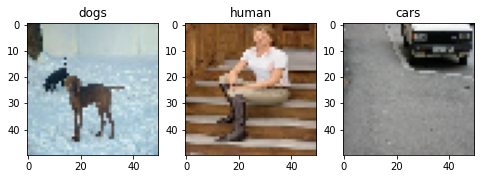

In [9]:
figure = plt.figure(figsize=(25,25))
for i in range(3):
    figures = figure.add_subplot(1,9,i+1)
    figures.set_title(classes[i])
    image = array_to_img(image_arr[204*i])
    plt.imshow(image)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(image_arr, image_data['class'], test_size=0.30)
y_train = np.asarray(y_train).astype(np.int32)
y_test = np.asarray(y_test).astype(np.int32)
y_train = tf.one_hot(y_train, 4)
y_test = tf.one_hot(y_test, 4)
alpha = 0.02
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(50,50,3)))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.Dense(4, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 50, 50, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 25, 25, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                  

In [13]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose = 1)

Epoch 1/20
15/15 [==============================] - 5s 154ms/step - loss: 1.0075 - accuracy: 0.5391 - val_loss: 0.9478 - val_accuracy: 0.5776
Epoch 2/20
15/15 [==============================] - 1s 94ms/step - loss: 0.6597 - accuracy: 0.7283 - val_loss: 0.7748 - val_accuracy: 0.6466
Epoch 3/20
15/15 [==============================] - 1s 70ms/step - loss: 0.5093 - accuracy: 0.8000 - val_loss: 0.5753 - val_accuracy: 0.7500
Epoch 4/20
15/15 [==============================] - 1s 58ms/step - loss: 0.4461 - accuracy: 0.8217 - val_loss: 0.5295 - val_accuracy: 0.7759
Epoch 5/20
15/15 [==============================] - 1s 59ms/step - loss: 0.4014 - accuracy: 0.8370 - val_loss: 0.5517 - val_accuracy: 0.7328
Epoch 6/20
15/15 [==============================] - 1s 67ms/step - loss: 0.3444 - accuracy: 0.8783 - val_loss: 0.4736 - val_accuracy: 0.8103
Epoch 7/20
15/15 [==============================] - 1s 58ms/step - loss: 0.3436 - accuracy: 0.8674 - val_loss: 0.4847 - val_accuracy: 0.8190
Epoch 8/20
1

In [14]:
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test accuracy:', score[1])
print('Test score:', score[0]) 

Test accuracy: 0.9704861044883728
Test score: 0.1367466300725937


In [17]:
# Task 3
text_data = pd.read_csv("/home/Stoliarchuk/tripadvisor_hotel_reviews.csv", names=['Review', 'Rating'], header=0, encoding='utf-8')
text_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [19]:
length = list(map(len, text_data.Review.values))
print('min_length:',np.min(length))
print('max_length:',np.max(length))
print('mean_size:',np.mean(length))
print('median_size:',np.median(length))
text_data.Rating.value_counts()

min_length: 44
max_length: 13501
mean_size: 724.896832755844
median_size: 537.0


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [26]:
dict_length = 1000
input_length = 50
tokenizer = Tokenizer(num_words=dict_length)
tokenizer.fit_on_texts(text_data.Review.values)
post_seq = tokenizer.texts_to_sequences(text_data.Review.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)
x_f = post_seq_padded
x_first = np.array(x_f)
y_f = text_data['Rating'].values
y_first = np.array(y_f)
x, y = shuffle(x_first, y_first, random_state=23)
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [27]:
model = Sequential()
model.add(Embedding(dict_length, 2, input_length=input_length))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 2)             2000      
                                                                 
 dense_6 (Dense)             (None, 50, 32)            96        
                                                                 
 dense_7 (Dense)             (None, 50, 32)            1056      
                                                                 
 bidirectional_3 (Bidirectio  (None, 50, 32)           1568      
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 32)           1568      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 32)              

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
45/45 [==============================] - 23s 196ms/step - loss: -11.2550 - accuracy: 0.0670 - val_loss: -19.2426 - val_accuracy: 0.0711
Epoch 2/10
45/45 [==============================] - 5s 116ms/step - loss: -22.6472 - accuracy: 0.0687 - val_loss: -25.9340 - val_accuracy: 0.0711
Epoch 3/10
45/45 [==============================] - 4s 100ms/step - loss: -28.6408 - accuracy: 0.0687 - val_loss: -31.4984 - val_accuracy: 0.0711
Epoch 4/10
45/45 [==============================] - 5s 102ms/step - loss: -33.9542 - accuracy: 0.0687 - val_loss: -36.6046 - val_accuracy: 0.0711
Epoch 5/10
45/45 [==============================] - 4s 92ms/step - loss: -38.9373 - accuracy: 0.0687 - val_loss: -41.4988 - val_accuracy: 0.0711
Epoch 6/10
45/45 [==============================] - 5s 118ms/step - loss: -43.7578 - accuracy: 0.0687 - val_loss: -46.2666 - val_accuracy: 0.0711
Epoch 7/10
45/45 [==============================] - 5s 112ms/step - loss: -48.4753 - accuracy: 0.0687 - val_loss: -50.9675 -

In [33]:
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test accuracy:', score[1])
print('Test score:', score[0]) 

Test accuracy: 0.06867700815200806
Test score: -64.65760803222656
